In [1]:
from sklearn import tree
import pandas as pd
import graphviz
import numpy as np

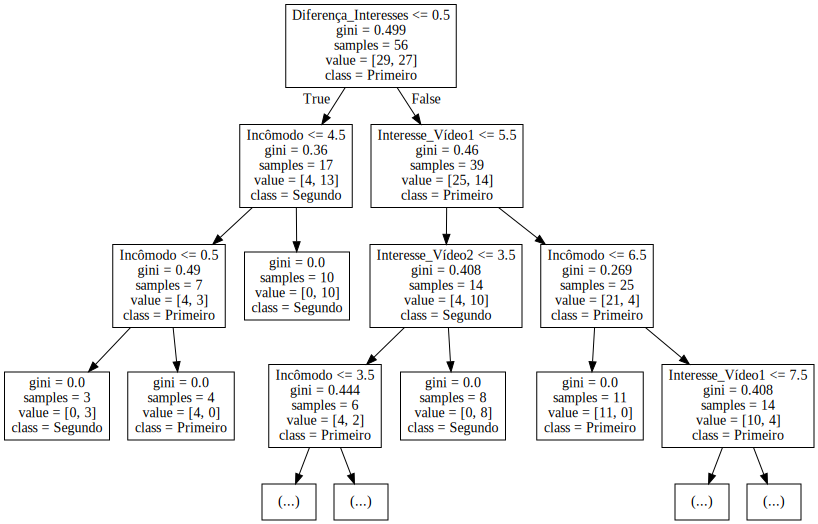

In [12]:
pd.options.mode.chained_assignment = None

def build_X_Y(df_t1, df_t2):
    X = []
    Y = []
    for i in range(len(df_t1)):
        x = df_t1.iloc[i]
        X.append([x['incomodo'], x['int1'], x['int2'], x['dif_inters']])
        Y.append(x['preferencia'])
    for i in range(len(df_t2)):
        x = df_t2.iloc[i]
        X.append([x['incomodo'], x['int1'], x['int2'], x['dif_inters']])
        Y.append(x['preferencia'])

    return X, Y

def accuracy(prediction, answers):
    matches = 0
    for i in range(len(prediction)):
        if prediction[i] == answers[i]:
            matches += 1
    return matches/len(prediction)

#troca as colunas de interesses de forma que o vídeo com pior qualidade seja sempre o primeiro
def preprocess_feeds(feeds):
    for i in range(len(feeds)):
        feed_sessao = feeds.iloc[i]['sessao']
        if  feed_sessao == 1 or feed_sessao == 3 or feed_sessao == 6:
            interesse_temp = feeds.iloc[i]['int1']
            feeds.at[i, 'int1'] = feeds.iloc[i]['int2']
            feeds.at[i, 'int2'] = interesse_temp
            
            if feeds.iloc[i]['preferencia'] == 'Primeiro':
                feeds.at[i, 'preferencia'] = 'Segundo'
            else:
                feeds.at[i, 'preferencia'] = 'Primeiro'
    return feeds
        
def add_rebuffs_columns(feedbacks):
    feedbacks['inicio'] = np.zeros(len(feedbacks))
    feedbacks['meio'] = np.zeros(len(feedbacks))
    feedbacks['fim'] = np.zeros(len(feedbacks))
    
    feedbacks.loc[feedbacks['sessao'] == 1, 'inicio'] = 2
    feedbacks.loc[feedbacks['sessao'] == 1, 'meio'] = 3
    
    feedbacks.loc[feedbacks['sessao'] == 2, 'inicio'] = 2
    feedbacks.loc[feedbacks['sessao'] == 2, 'fim'] = 2
    
    feedbacks.loc[feedbacks['sessao'] == 3, 'inicio'] = 5
    feedbacks.loc[feedbacks['sessao'] == 3, 'meio'] = 2
    
    feedbacks.loc[feedbacks['sessao'] == 4, 'inicio'] = 3
    feedbacks.loc[feedbacks['sessao'] == 4, 'meio'] = 1
    feedbacks.loc[feedbacks['sessao'] == 4, 'fim'] = 2
    
    feedbacks.loc[feedbacks['sessao'] == 5, 'inicio'] = 3
    feedbacks.loc[feedbacks['sessao'] == 5, 'fim'] = 2
    
    feedbacks.loc[feedbacks['sessao'] == 6, 'inicio'] = 3
    feedbacks.loc[feedbacks['sessao'] == 6, 'meio'] = 2
    
    feedbacks.loc[feedbacks['sessao'] == 7, 'inicio'] = 2
    feedbacks.loc[feedbacks['sessao'] == 7, 'fim'] = 3
    return feedbacks
        

def write_to_csv(file_name):
    feeds.to_csv("feeds_qos_details.csv")
    
qos_features = False
    
feeds = pd.read_csv("Feedbacks_17_03.csv", names=['sessao', 'preferencia', 'incomodo', 'int1', 'int2', 'data', 'justif', 'email'])
feeds = preprocess_feeds(feeds)
    
interesses1 = feeds['int1']
interesses2 = feeds['int2']
feeds['dif_inters'] = abs(interesses2 - interesses1) # adiciona coluna de diferenças no dataframe

clf = tree.DecisionTreeClassifier()

# Constrói arvore de decisão para todo o dataset

if qos_features:
    feeds = add_rebuffs_columns(feeds)
    X = np.array([feeds['incomodo'], feeds['int1'], feeds['int2'], 
        feeds['dif_inters'], feeds['inicio'], feeds['meio'], feeds['fim']]).transpose()
else:
    X = np.array([feeds['incomodo'], feeds['int1'], feeds['int2'], 
        feeds['dif_inters']]).transpose()

Y = np.array(feeds['preferencia'])

clf.fit(X, Y)

 
feature_names=['Incômodo', 'Interesse_Vídeo1', 'Interesse_Vídeo2',
               'Diferença_Interesses']
if qos_features:
    feature_names += ['R_Inicio', 'R_Meio', 'R_Fim']
    
dot_data = tree.export_graphviz(clf, max_depth=3, feature_names=feature_names,
                                            class_names=['Primeiro', 'Segundo'],out_file=None) 
graph = graphviz.Source(dot_data)
#graph.render("feeds_versao2")
graph

